In [36]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [37]:
pip install requests


Note: you may need to restart the kernel to use updated packages.


In [38]:
pip install pandas  


Note: you may need to restart the kernel to use updated packages.


In [39]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


In [40]:
import matplotlib.pyplot as plt

In [41]:
pip install scikit-learn 

Note: you may need to restart the kernel to use updated packages.


In [42]:
import os
import requests
import zipfile
import pandas as pd

def download_extract_read_zip_file(url, file_format):
    try:
        # Effettua una chiamata API per scaricare il file ZIP
        response = requests.get(url)

        if response.status_code == 200:
            # Determina la cartella di download predefinita del sistema
            download_folder = os.path.expanduser("~" + os.sep + "Downloads")

            # Salva il contenuto del file ZIP nella cartella di download
            zip_file_path = os.path.join(download_folder, "downloaded_file.zip")
            with open(zip_file_path, "wb") as f:
                f.write(response.content)

            # Estrai il file ZIP nella stessa cartella
            with zipfile.ZipFile(zip_file_path, "r") as zip_ref:
                zip_ref.extractall(download_folder)

            # Trova il file nel formato specificato (ad esempio CSV) nella cartella di download
            for filename in os.listdir(download_folder):
                if filename.endswith(f".{file_format}"):
                    file_path = os.path.join(download_folder, filename)
                    # Leggi il file nel formato specificato utilizzando pandas
                    df = pd.read_csv(file_path)  # Cambia a pd.read_excel() se il formato è Excel
                    return df
            print(f"Nessun file {file_format} trovato nella cartella di download.")
            return None
        else:
            print("Errore nella chiamata API")
            return None
    except Exception as e:
        print(f"Si è verificato un errore: {str(e)}")
        return None

# Utilizzo della funzione per scaricare, estrarre e leggere il file ZIP
url = "https://archive.ics.uci.edu/static/public/864/room+occupancy+estimation.zip"
file_format = "csv"  # Cambia il formato in base al tipo di file che stai cercando di leggere
dataframe = download_extract_read_zip_file(url, file_format)


if dataframe is not None:
    # Puoi ora utilizzare il DataFrame per eseguire operazioni sui dati
    print(dataframe.head())


         Date      Time  S1_Temp  S2_Temp  S3_Temp  S4_Temp  S1_Light  \
0  2017/12/22  10:49:41    24.94    24.75    24.56    25.38       121   
1  2017/12/22  10:50:12    24.94    24.75    24.56    25.44       121   
2  2017/12/22  10:50:42    25.00    24.75    24.50    25.44       121   
3  2017/12/22  10:51:13    25.00    24.75    24.56    25.44       121   
4  2017/12/22  10:51:44    25.00    24.75    24.56    25.44       121   

   S2_Light  S3_Light  S4_Light  S1_Sound  S2_Sound  S3_Sound  S4_Sound  \
0        34        53        40      0.08      0.19      0.06      0.06   
1        33        53        40      0.93      0.05      0.06      0.06   
2        34        53        40      0.43      0.11      0.08      0.06   
3        34        53        40      0.41      0.10      0.10      0.09   
4        34        54        40      0.18      0.06      0.06      0.06   

   S5_CO2  S5_CO2_Slope  S6_PIR  S7_PIR  Room_Occupancy_Count  
0     390      0.769231       0       0       

Analizziamo adesso il dataframe appena importato, 

In [43]:
import pandas as pd
df=pd.DataFrame(dataframe)
df=dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10129 entries, 0 to 10128
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  10129 non-null  object 
 1   Time                  10129 non-null  object 
 2   S1_Temp               10129 non-null  float64
 3   S2_Temp               10129 non-null  float64
 4   S3_Temp               10129 non-null  float64
 5   S4_Temp               10129 non-null  float64
 6   S1_Light              10129 non-null  int64  
 7   S2_Light              10129 non-null  int64  
 8   S3_Light              10129 non-null  int64  
 9   S4_Light              10129 non-null  int64  
 10  S1_Sound              10129 non-null  float64
 11  S2_Sound              10129 non-null  float64
 12  S3_Sound              10129 non-null  float64
 13  S4_Sound              10129 non-null  float64
 14  S5_CO2                10129 non-null  int64  
 15  S5_CO2_Slope       

il dataset importato è composto da 19 colonne, 10128 osservazioni, inoltre non risultano esserci valori mancanti. Le prime due colonne rappresentano data ed ora di osservazione dei parametri, mentre l'ultima colonna rappresenta la variabile di "risposta" y ovvero il numero di occupanti la stanza. Osserviamo adesso le prime righe del dataset per capire come sono strutturati i dati. 

In [44]:
df.head()

Date      Time  S1_Temp  S2_Temp  S3_Temp  S4_Temp  S1_Light  \
0  2017/12/22  10:49:41    24.94    24.75    24.56    25.38       121   
1  2017/12/22  10:50:12    24.94    24.75    24.56    25.44       121   
2  2017/12/22  10:50:42    25.00    24.75    24.50    25.44       121   
3  2017/12/22  10:51:13    25.00    24.75    24.56    25.44       121   
4  2017/12/22  10:51:44    25.00    24.75    24.56    25.44       121   

   S2_Light  S3_Light  S4_Light  S1_Sound  S2_Sound  S3_Sound  S4_Sound  \
0        34        53        40      0.08      0.19      0.06      0.06   
1        33        53        40      0.93      0.05      0.06      0.06   
2        34        53        40      0.43      0.11      0.08      0.06   
3        34        53        40      0.41      0.10      0.10      0.09   
4        34        54        40      0.18      0.06      0.06      0.06   

   S5_CO2  S5_CO2_Slope  S6_PIR  S7_PIR  Room_Occupancy_Count  
0     390      0.769231       0       0                     1  
1     390      0.646154       0       0                     1  
2     390      0.519231       0       0                     1  
3     390      0.388462       0       0                     1  
4     390      0.253846       0       0                     1

In [37]:
dfh=df.head()

In [38]:
dfh.transpose()

0           1           2           3  \
Date                  2017/12/22  2017/12/22  2017/12/22  2017/12/22   
Time                    10:49:41    10:50:12    10:50:42    10:51:13   
S1_Temp                    24.94       24.94        25.0        25.0   
S2_Temp                    24.75       24.75       24.75       24.75   
S3_Temp                    24.56       24.56        24.5       24.56   
S4_Temp                    25.38       25.44       25.44       25.44   
S1_Light                     121         121         121         121   
S2_Light                      34          33          34          34   
S3_Light                      53          53          53          53   
S4_Light                      40          40          40          40   
S1_Sound                    0.08        0.93        0.43        0.41   
S2_Sound                    0.19        0.05        0.11         0.1   
S3_Sound                    0.06        0.06        0.08         0.1   
S4_Sound                    0.06        0.06        0.06        0.09   
S5_CO2                       390         390         390         390   
S5_CO2_Slope            0.769231    0.646154    0.519231    0.388462   
S6_PIR                         0           0           0           0   
S7_PIR                         0           0           0           0   
Room_Occupancy_Count           1           1           1           1   

                               4  
Date                  2017/12/22  
Time                    10:51:44  
S1_Temp                     25.0  
S2_Temp                    24.75  
S3_Temp                    24.56  
S4_Temp                    25.44  
S1_Light                     121  
S2_Light                      34  
S3_Light                      54  
S4_Light                      40  
S1_Sound                    0.18  
S2_Sound                    0.06  
S3_Sound                    0.06  
S4_Sound                    0.06  
S5_CO2                       390  
S5_CO2_Slope            0.253846  
S6_PIR                         0  
S7_PIR                         0  
Room_Occupancy_Count           1

Trasformo gli oggetti data ed ora in formato datetime. 

In [45]:
df['Date'] = pd.to_datetime(df['Date'])
df['Time']= pd.to_datetime(df['Time'],format='%H:%M:%S')
print(df)

            Date                Time  S1_Temp  S2_Temp  S3_Temp  S4_Temp  \
0     2017-12-22 1900-01-01 10:49:41    24.94    24.75    24.56    25.38   
1     2017-12-22 1900-01-01 10:50:12    24.94    24.75    24.56    25.44   
2     2017-12-22 1900-01-01 10:50:42    25.00    24.75    24.50    25.44   
3     2017-12-22 1900-01-01 10:51:13    25.00    24.75    24.56    25.44   
4     2017-12-22 1900-01-01 10:51:44    25.00    24.75    24.56    25.44   
...          ...                 ...      ...      ...      ...      ...   
10124 2018-01-11 1900-01-01 08:58:07    25.06    25.13    24.69    25.31   
10125 2018-01-11 1900-01-01 08:58:37    25.06    25.06    24.69    25.25   
10126 2018-01-11 1900-01-01 08:59:08    25.13    25.06    24.69    25.25   
10127 2018-01-11 1900-01-01 08:59:39    25.13    25.06    24.69    25.25   
10128 2018-01-11 1900-01-01 09:00:09    25.13    25.06    24.69    25.25   

       S1_Light  S2_Light  S3_Light  S4_Light  S1_Sound  S2_Sound  S3_Sound  \
0       

verifico che la trasformazione sia stata eseguita

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10129 entries, 0 to 10128
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  10129 non-null  datetime64[ns]
 1   Time                  10129 non-null  datetime64[ns]
 2   S1_Temp               10129 non-null  float64       
 3   S2_Temp               10129 non-null  float64       
 4   S3_Temp               10129 non-null  float64       
 5   S4_Temp               10129 non-null  float64       
 6   S1_Light              10129 non-null  int64         
 7   S2_Light              10129 non-null  int64         
 8   S3_Light              10129 non-null  int64         
 9   S4_Light              10129 non-null  int64         
 10  S1_Sound              10129 non-null  float64       
 11  S2_Sound              10129 non-null  float64       
 12  S3_Sound              10129 non-null  float64       
 13  S4_Sound        

possiamo adesso analizzare le principali statistiche descrittive. 

In [47]:
df.describe()

S1_Temp       S2_Temp       S3_Temp       S4_Temp      S1_Light  \
count  10129.000000  10129.000000  10129.000000  10129.000000  10129.000000   
mean      25.454012     25.546059     25.056621     25.754125     25.445059   
std        0.351351      0.586325      0.427283      0.356434     51.011264   
min       24.940000     24.750000     24.440000     24.940000      0.000000   
25%       25.190000     25.190000     24.690000     25.440000      0.000000   
50%       25.380000     25.380000     24.940000     25.750000      0.000000   
75%       25.630000     25.630000     25.380000     26.000000     12.000000   
max       26.380000     29.000000     26.190000     26.560000    165.000000   

          S2_Light      S3_Light      S4_Light      S1_Sound      S2_Sound  \
count  10129.00000  10129.000000  10129.000000  10129.000000  10129.000000   
mean      26.01629     34.248494     13.220259      0.168178      0.120066   
std       67.30417     58.400744     19.602219      0.316709      0.266503   
min        0.00000      0.000000      0.000000      0.060000      0.040000   
25%        0.00000      0.000000      0.000000      0.070000      0.050000   
50%        0.00000      0.000000      0.000000      0.080000      0.050000   
75%       14.00000     50.000000     22.000000      0.080000      0.060000   
max      258.00000    280.000000     74.000000      3.880000      3.440000   

           S3_Sound      S4_Sound        S5_CO2  S5_CO2_Slope        S6_PIR  \
count  10129.000000  10129.000000  10129.000000  10129.000000  10129.000000   
mean       0.158119      0.103840    460.860401     -0.004830      0.090137   
std        0.413637      0.120683    199.964940      1.164990      0.286392   
min        0.040000      0.050000    345.000000     -6.296154      0.000000   
25%        0.060000      0.060000    355.000000     -0.046154      0.000000   
50%        0.060000      0.080000    360.000000      0.000000      0.000000   
75%        0.070000      0.100000    465.000000      0.000000      0.000000   
max        3.670000      3.400000   1270.000000      8.980769      1.000000   

             S7_PIR  Room_Occupancy_Count  
count  10129.000000          10129.000000  
mean       0.079574              0.398559  
std        0.270645              0.893633  
min        0.000000              0.000000  
25%        0.000000              0.000000  
50%        0.000000              0.000000  
75%        0.000000              0.000000  
max        1.000000              3.000000

In [6]:
df=df.describe()

In [7]:
df.transpose()

count        mean         std         min         25%  \
S1_Temp               10129.0   25.454012    0.351351   24.940000   25.190000   
S2_Temp               10129.0   25.546059    0.586325   24.750000   25.190000   
S3_Temp               10129.0   25.056621    0.427283   24.440000   24.690000   
S4_Temp               10129.0   25.754125    0.356434   24.940000   25.440000   
S1_Light              10129.0   25.445059   51.011264    0.000000    0.000000   
S2_Light              10129.0   26.016290   67.304170    0.000000    0.000000   
S3_Light              10129.0   34.248494   58.400744    0.000000    0.000000   
S4_Light              10129.0   13.220259   19.602219    0.000000    0.000000   
S1_Sound              10129.0    0.168178    0.316709    0.060000    0.070000   
S2_Sound              10129.0    0.120066    0.266503    0.040000    0.050000   
S3_Sound              10129.0    0.158119    0.413637    0.040000    0.060000   
S4_Sound              10129.0    0.103840    0.120683    0.050000    0.060000   
S5_CO2                10129.0  460.860401  199.964940  345.000000  355.000000   
S5_CO2_Slope          10129.0   -0.004830    1.164990   -6.296154   -0.046154   
S6_PIR                10129.0    0.090137    0.286392    0.000000    0.000000   
S7_PIR                10129.0    0.079574    0.270645    0.000000    0.000000   
Room_Occupancy_Count  10129.0    0.398559    0.893633    0.000000    0.000000   

                         50%     75%          max  
S1_Temp                25.38   25.63    26.380000  
S2_Temp                25.38   25.63    29.000000  
S3_Temp                24.94   25.38    26.190000  
S4_Temp                25.75   26.00    26.560000  
S1_Light                0.00   12.00   165.000000  
S2_Light                0.00   14.00   258.000000  
S3_Light                0.00   50.00   280.000000  
S4_Light                0.00   22.00    74.000000  
S1_Sound                0.08    0.08     3.880000  
S2_Sound                0.05    0.06     3.440000  
S3_Sound                0.06    0.07     3.670000  
S4_Sound                0.08    0.10     3.400000  
S5_CO2                360.00  465.00  1270.000000  
S5_CO2_Slope            0.00    0.00     8.980769  
S6_PIR                  0.00    0.00     1.000000  
S7_PIR                  0.00    0.00     1.000000  
Room_Occupancy_Count    0.00    0.00     3.000000

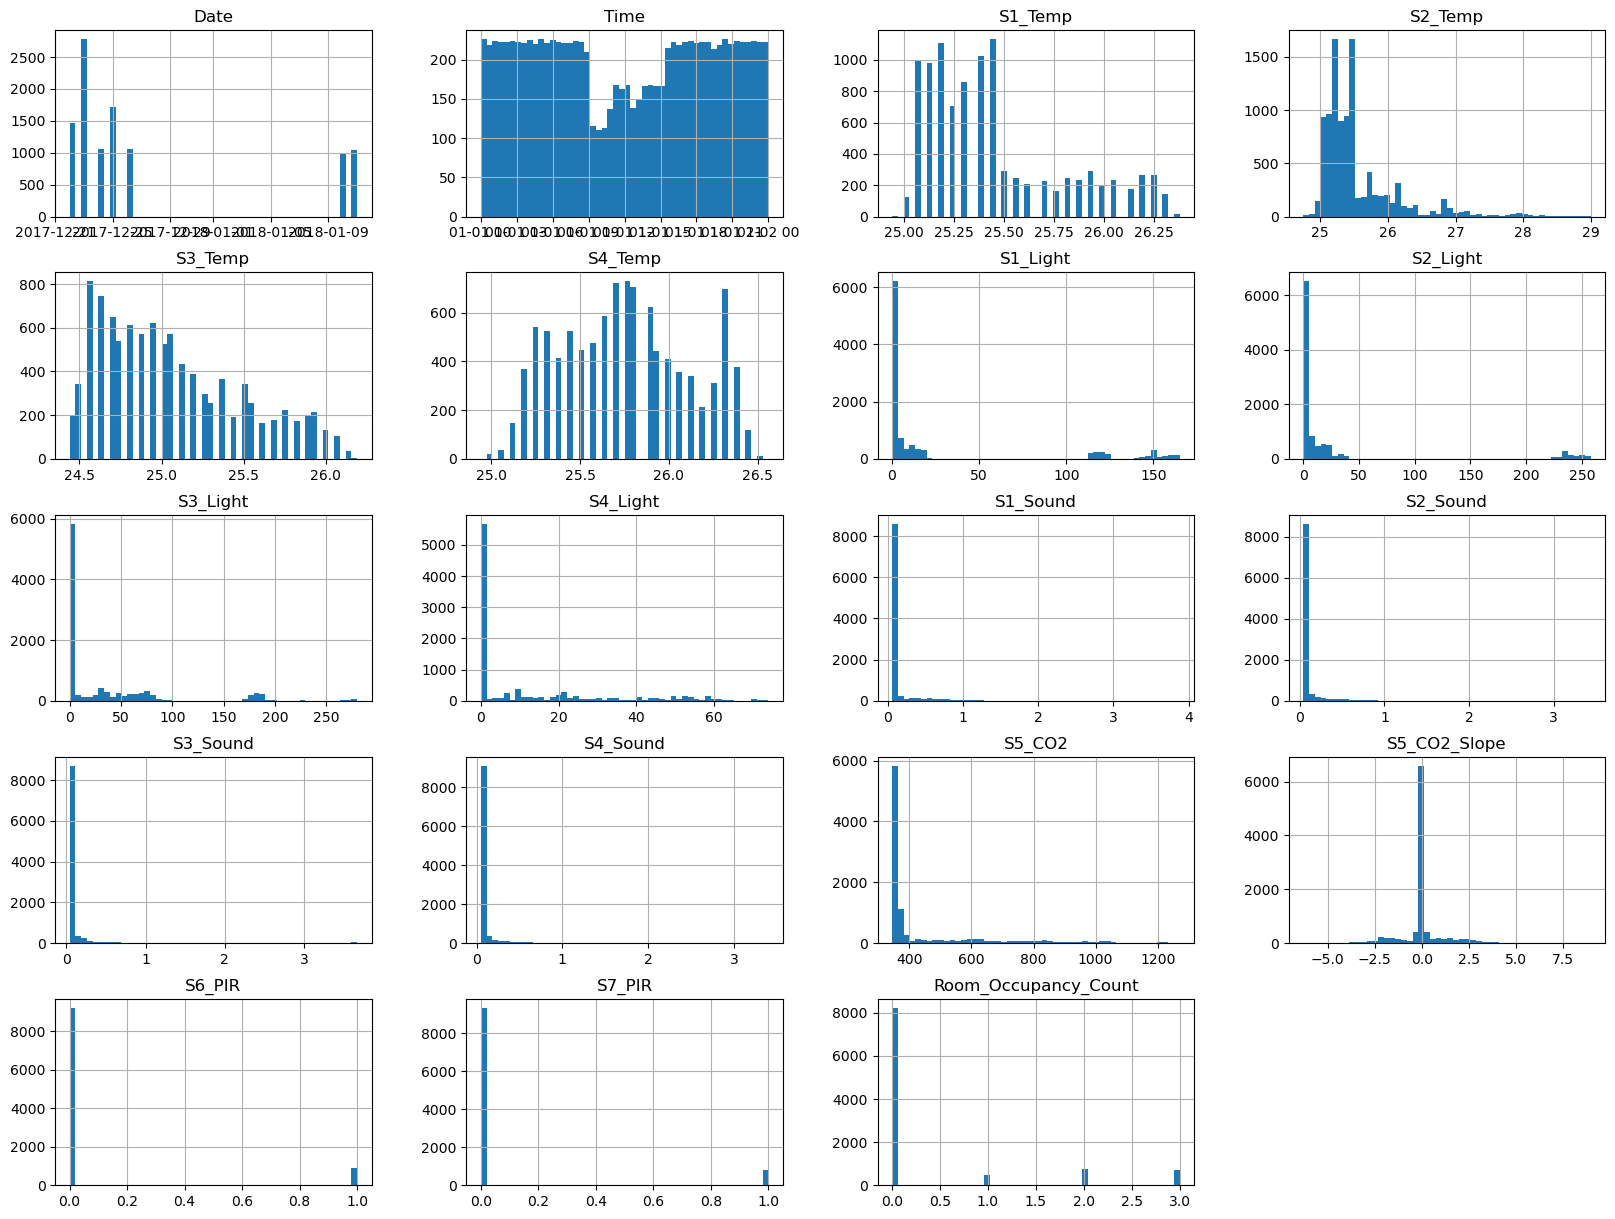

In [48]:
df.hist(bins=50, figsize=(20, 15)) 
plt.show()

Analizziamo la correlazione tra le variabili. 

In [49]:
corr=df.corr()
print(corr)

                       S1_Temp   S2_Temp   S3_Temp   S4_Temp  S1_Light  \
S1_Temp               1.000000  0.799707  0.948839  0.855279  0.680743   
S2_Temp               0.799707  1.000000  0.765525  0.696581  0.639773   
S3_Temp               0.948839  0.765525  1.000000  0.885186  0.594311   
S4_Temp               0.855279  0.696581  0.885186  1.000000  0.581482   
S1_Light              0.680743  0.639773  0.594311  0.581482  1.000000   
S2_Light              0.548735  0.645987  0.500054  0.456350  0.842090   
S3_Light              0.645163  0.607349  0.642601  0.588459  0.816438   
S4_Light              0.212217  0.370897  0.301419  0.386871  0.510853   
S1_Sound              0.436099  0.438274  0.375183  0.355111  0.601166   
S2_Sound              0.391137  0.409545  0.344026  0.312594  0.534274   
S3_Sound              0.438769  0.427133  0.398177  0.340808  0.494080   
S4_Sound              0.355826  0.378724  0.326182  0.294939  0.441712   
S5_CO2                0.866718  0.7437

/var/folders/zc/xdrwsxfs3vn2s376w3pc7k5c0000gq/T/ipykernel_27442/2393533747.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


<Axes: >

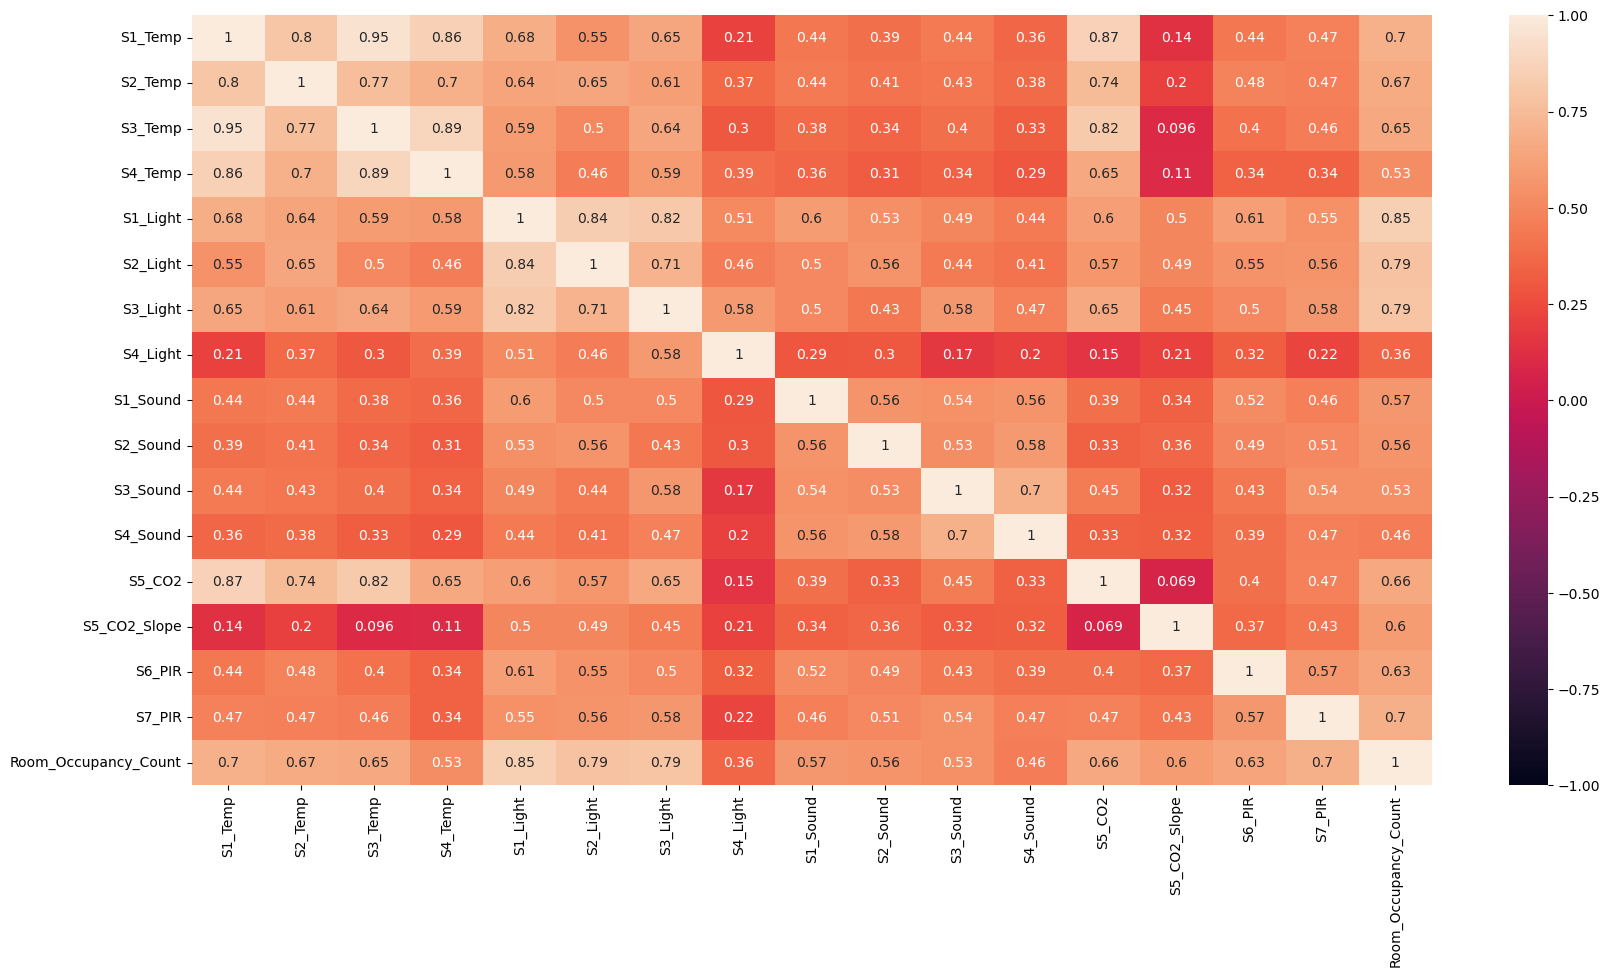

In [50]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

corr_matrix=corr
plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix,vmin=-1, vmax=1, annot=True,)

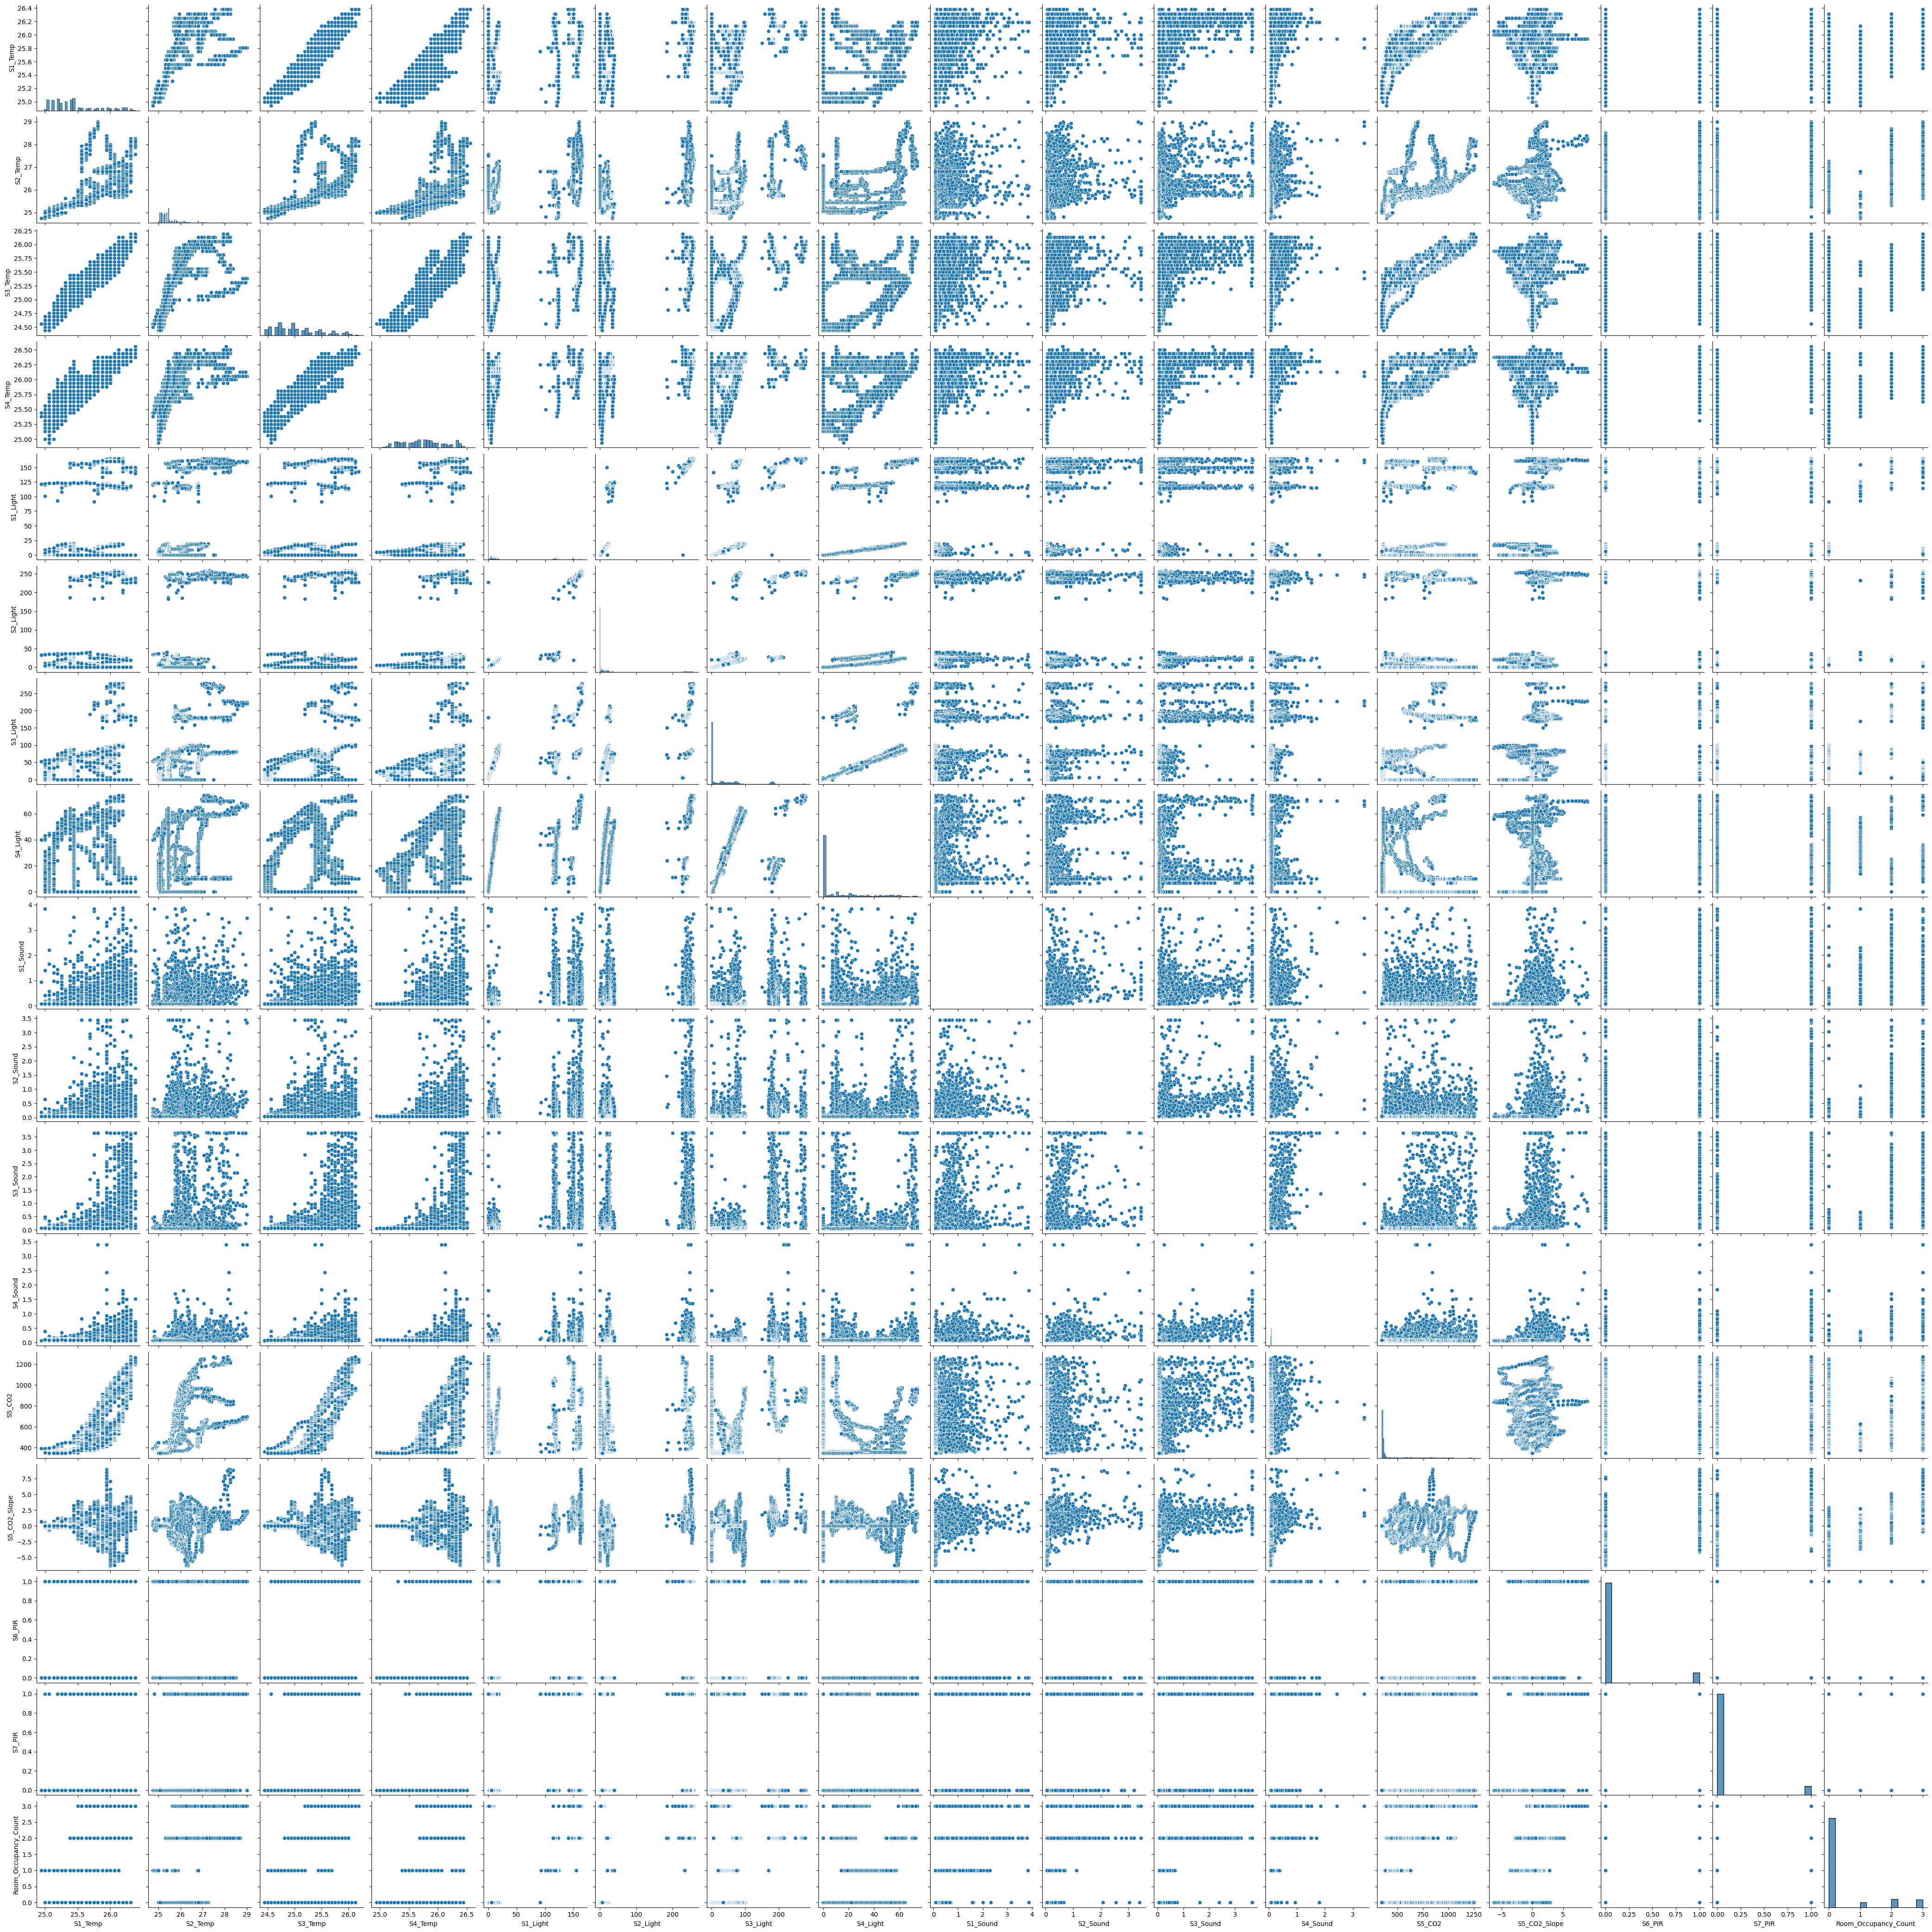

In [18]:
sns.pairplot(df)


separo adesso le features(X) dal target (y) (numero di occupanti)

In [51]:
y= df.iloc[:, -1]
print(y)

0        1
1        1
2        1
3        1
4        1
        ..
10124    0
10125    0
10126    0
10127    0
10128    0
Name: Room_Occupancy_Count, Length: 10129, dtype: int64


In [52]:
X=df.iloc[:,2:-1]
print(X)

       S1_Temp  S2_Temp  S3_Temp  S4_Temp  S1_Light  S2_Light  S3_Light  \
0        24.94    24.75    24.56    25.38       121        34        53   
1        24.94    24.75    24.56    25.44       121        33        53   
2        25.00    24.75    24.50    25.44       121        34        53   
3        25.00    24.75    24.56    25.44       121        34        53   
4        25.00    24.75    24.56    25.44       121        34        54   
...        ...      ...      ...      ...       ...       ...       ...   
10124    25.06    25.13    24.69    25.31         6         7        33   
10125    25.06    25.06    24.69    25.25         6         7        34   
10126    25.13    25.06    24.69    25.25         6         7        34   
10127    25.13    25.06    24.69    25.25         6         7        34   
10128    25.13    25.06    24.69    25.25         6         7        34   

       S4_Light  S1_Sound  S2_Sound  S3_Sound  S4_Sound  S5_CO2  S5_CO2_Slope  \
0            40   

Prima di passare all'applicazione della SVM Classification è necessario trattare i dati 

In [53]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
scaled = scaler.fit_transform(X) 
print(scaled)

[[-1.46303347 -1.35777517 -1.16233429 ...  0.66446859 -0.31474885
  -0.29402867]
 [-1.46303347 -1.35777517 -1.16233429 ...  0.558817   -0.31474885
  -0.29402867]
 [-1.29225542 -1.35777517 -1.30276354 ...  0.4498638  -0.31474885
  -0.29402867]
 ...
 [-0.92223631 -0.82903247 -0.85807092 ...  0.00414617 -0.31474885
  -0.29402867]
 [-0.92223631 -0.82903247 -0.85807092 ...  0.00414617 -0.31474885
  -0.29402867]
 [-0.92223631 -0.82903247 -0.85807092 ...  0.00414617 -0.31474885
  -0.29402867]]


Divido adesso il dataset in features (x) e target (y),
successivamente si splittano il dataset in X_train, e X_test, stessa cosa per il target,  

In [54]:

from sklearn.model_selection import train_test_split 
X=scaled

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state = 10)

In [55]:
print(X_train.shape) 
print(X_test.shape) 
print(y_train.shape)
print(y_test.shape)

(8103, 16)
(2026, 16)
(8103,)
(2026,)


In [56]:
print(y_train)

9788    0
9540    0
3343    1
394     0
1459    0
       ..
9372    0
7291    0
1344    0
7293    0
1289    0
Name: Room_Occupancy_Count, Length: 8103, dtype: int64


In [57]:
print(X_train)

[[-0.92223631 -0.70963896 -1.16233429 ...  0.00414617 -0.31474885
  -0.29402867]
 [-0.92223631 -0.60730166 -0.85807092 ...  0.00414617 -0.31474885
  -0.29402867]
 [ 1.72482346  2.15580537  1.1781532  ...  0.75691373 -0.31474885
  -0.29402867]
 ...
 [ 0.13089499 -0.07855896  0.00790946 ... -0.73211334 -0.31474885
  -0.29402867]
 [-0.40990216 -0.40262706 -0.41337829 ...  0.00414617 -0.31474885
  -0.29402867]
 [ 0.30167304  0.02377834  0.17174358 ... -1.03916326 -0.31474885
  -0.29402867]]


Implementazione SVM prima Kernel Lineare  poi RBF

In [58]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score

import pandas as pd

X_features = np.array(scaled)
y_target = np.array(df.iloc[:, -1].to_numpy())

# Grid values for C and gamma

gridHyperPar = {"C": [0.001, 0.1, 1, 10, 100, 10000, 100000]}

# Configure the outer cross-validation class

outerCV = KFold(n_splits=10)

# Arrays to store outer cross-validation scores

outerScores_Linear = np.array([])
outerScores_RBF = np.array([])

# Linear Kernel
best_model_linear = None
best_score_linear = 0.0  # Initialize with a low value

for trainOuter, testOuter in outerCV.split(X_features):
    current_X_Outer_TrainingSet = X_features[trainOuter]
    current_X_Outer_TestSet = X_features[testOuter]
    current_y_Outer_TrainingSet = y_target[trainOuter]
    current_y_Outer_TestSet = y_target[testOuter]

    # Configure the inner cross-validation class

    innerCV = KFold(n_splits=10, shuffle=True, random_state=1)

    svmModel = SVC(kernel="linear")

    # The inner cross-validation is performed by the GridSearch function

    gridSearch = GridSearchCV(svmModel,
                              gridHyperPar,
                              scoring='accuracy',
                              cv=innerCV, refit=True)

    # Execute search

    searchResult = gridSearch.fit(current_X_Outer_TrainingSet,
                                  current_y_Outer_TrainingSet.ravel())

    # Given that refit=True, gridSearch.fit returns the best hyperparameter over all current_X_Outer_TrainingSet

    best_model = searchResult.best_estimator_

    bestHyperParameterC = gridSearch.best_params_['C']

    # We can now evaluate the current model on the hold-out dataset current_X_Outer_TestSet

    current_y_Predictions = best_model.predict(current_X_Outer_TestSet)

    # Compute accuracy

    currentScore = accuracy_score(current_y_Outer_TestSet,
                                  current_y_Predictions)

    # Append to array of scores

    outerScores_Linear = np.append(outerScores_Linear, currentScore)

    # Check if this model has the highest accuracy so far
    if currentScore > best_score_linear:
        best_score_linear = currentScore
        best_model_linear = best_model

    # Report progress

    print('Accuracy (Linear Kernel) = %.3f, Best Hyper Parameter C = %.3f' % (currentScore, bestHyperParameterC))

# RBF Kernel
gridHyperPar = {"C": [0.001, 0.1, 1, 10, 100, 10000, 50000, 100000],
                "gamma": [0.001, 0.01, 0.1]}

best_model_rbf = None
best_score_rbf = 0.0  # Initialize with a low value

for trainOuter, testOuter in outerCV.split(X_features):
    current_X_Outer_TrainingSet = X_features[trainOuter]
    current_X_Outer_TestSet = X_features[testOuter]
    current_y_Outer_TrainingSet = y_target[trainOuter]
    current_y_Outer_TestSet = y_target[testOuter]

    # Configure the inner cross-validation class

    innerCV = KFold(n_splits=10, shuffle=True, random_state=1)

    svmModel = SVC(kernel="rbf",
                   decision_function_shape='ovr',
                   class_weight='balanced')

    # The inner cross-validation is performed by the GridSearch function

    gridSearch = GridSearchCV(svmModel,
                              gridHyperPar,
                              scoring='accuracy',
                              cv=innerCV, refit=True)

    # Execute search

    searchResult = gridSearch.fit(current_X_Outer_TrainingSet,
                                  current_y_Outer_TrainingSet.ravel())

    # Given that refit=True, gridSearch.fit returns the best hyperparameter over all current_X_Outer_TrainingSet

    best_model = searchResult.best_estimator_

    bestHyperParameterC = gridSearch.best_params_['C']
    bestHyperParameterGamma = gridSearch.best_params_['gamma']

    # We can now evaluate the current model on the hold-out dataset current_X_Outer_TestSet

    current_y_Predictions = best_model.predict(current_X_Outer_TestSet)

    # Compute accuracy

    currentScore = accuracy_score(current_y_Outer_TestSet,
                                  current_y_Predictions)

    # Append to array of scores

    outerScores_RBF = np.append(outerScores_RBF, currentScore)

    # Check if this model has the highest accuracy so far
    if currentScore > best_score_rbf:
        best_score_rbf = currentScore
        best_model_rbf = best_model

    # Report progress

    print('Accuracy (RBF Kernel) = %.3f, Best Hyper Parameter C = %.3f, Best Hyper Parameter Gamma = %.3f' % (currentScore, bestHyperParameterC, bestHyperParameterGamma))

# Print the best models
print("\nBest Model (Linear Kernel):")
print(best_model_linear)

print("\nBest Model (RBF Kernel):")
print(best_model_rbf)


Accuracy (Linear Kernel) = 0.770, Best Hyper Parameter C = 10.000
Accuracy (Linear Kernel) = 1.000, Best Hyper Parameter C = 1.000
Accuracy (Linear Kernel) = 0.998, Best Hyper Parameter C = 1.000
Accuracy (Linear Kernel) = 0.976, Best Hyper Parameter C = 10.000
Accuracy (Linear Kernel) = 1.000, Best Hyper Parameter C = 10.000
Accuracy (Linear Kernel) = 1.000, Best Hyper Parameter C = 1.000
Accuracy (Linear Kernel) = 1.000, Best Hyper Parameter C = 10.000
Accuracy (Linear Kernel) = 1.000, Best Hyper Parameter C = 10.000
Accuracy (Linear Kernel) = 0.942, Best Hyper Parameter C = 1.000
Accuracy (Linear Kernel) = 1.000, Best Hyper Parameter C = 1.000
Accuracy (RBF Kernel) = 0.746, Best Hyper Parameter C = 10000.000, Best Hyper Parameter Gamma = 0.001
Accuracy (RBF Kernel) = 1.000, Best Hyper Parameter C = 100.000, Best Hyper Parameter Gamma = 0.001
Accuracy (RBF Kernel) = 1.000, Best Hyper Parameter C = 10.000, Best Hyper Parameter Gamma = 0.010
Accuracy (RBF Kernel) = 0.963, Best Hyper Pa

Confronto dei Kernerl attraverso la matrice di confusione. 

Matrice di Confusione per il Modello Lineare:
[[1628    1    0    0]
 [   0   80    2    0]
 [   0    1  160    5]
 [   0    0    2  147]]

Matrice di Confusione per il Modello RBF:
[[1628    1    0    0]
 [   0   80    2    0]
 [   0    1  161    4]
 [   0    0    2  147]]


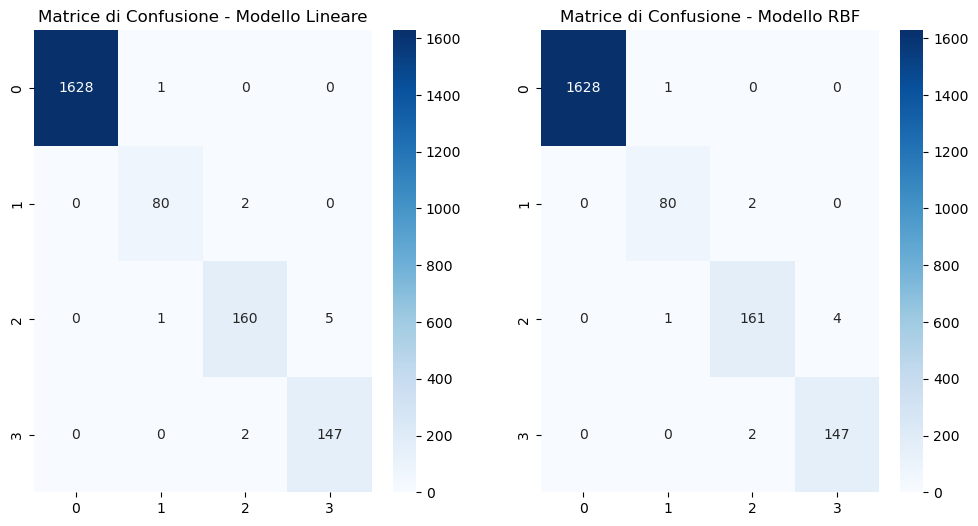

In [59]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state = 10)
X_features = np.array(scaled)
y_target = np.array(df.iloc[:, -1].to_numpy())


# Definisci i migliori modelli con i parametri specificati
best_model_linear = SVC(C=1, kernel='linear')
best_model_rbf = SVC(C=100, kernel='rbf', class_weight='balanced', gamma=0.001)

# Addestra i modelli sui dati di addestramento (assicurati di avere X_train e y_train)
best_model_linear.fit(X_train, y_train)
best_model_rbf.fit(X_train, y_train)

# Effettua le predizioni sui dati di test
y_pred_linear = best_model_linear.predict(X_test)
y_pred_rbf = best_model_rbf.predict(X_test)

# Calcola le matrici di confusione
conf_matrix_linear = confusion_matrix(y_test, y_pred_linear)
conf_matrix_rbf = confusion_matrix(y_test, y_pred_rbf)

# Stampa le matrici di confusione
print("Matrice di Confusione per il Modello Lineare:")
print(conf_matrix_linear)

print("\nMatrice di Confusione per il Modello RBF:")
print(conf_matrix_rbf)

# Visualizza le matrici di confusione come heatmap
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_linear, annot=True, fmt='g', cmap='Blues')
plt.title("Matrice di Confusione - Modello Lineare")

plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_rbf, annot=True, fmt='g', cmap='Blues')
plt.title("Matrice di Confusione - Modello RBF")

plt.show()


In [60]:
from sklearn.metrics import classification_report
print("Metriche per il Modello Lineare:")
print(classification_report(y_test, y_pred_linear))
print("Metriche per il Modello RBF:")
print(classification_report(y_test, y_pred_rbf))



Metriche per il Modello Lineare:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1629
           1       0.98      0.98      0.98        82
           2       0.98      0.96      0.97       166
           3       0.97      0.99      0.98       149

    accuracy                           0.99      2026
   macro avg       0.98      0.98      0.98      2026
weighted avg       0.99      0.99      0.99      2026

Metriche per il Modello RBF:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1629
           1       0.98      0.98      0.98        82
           2       0.98      0.97      0.97       166
           3       0.97      0.99      0.98       149

    accuracy                           1.00      2026
   macro avg       0.98      0.98      0.98      2026
weighted avg       1.00      1.00      1.00      2026

